# Assignment: CERES data

To solve the following exercises you can copy and paste code from the previous notebook. The code modifications required to solve the exercises are minimal (e.g. changing the name of a variable, add a small computation...): don't think too "complicated"!

## Importing the modules

This one is easy. I'll do it for you:

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## TOA fluxes 

Read the TOA dataset we used during the lesson. Do you remember all variables it contains?

In [2]:
ds=xr.open_dataset(r'C:\Users\Beatrice Diana\Desktop\UIBK\Physics of the climate system\Notebook\Week2\data\CERES_EBAF-TOA_Ed4.1_Clim-2005-2015.nc') #Radiation TOA
ds

<xarray.Dataset>
Dimensions:            (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon                (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat                (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * month              (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    toa_sw_all_clim    (month, lat, lon) float32 ...
    toa_lw_all_clim    (month, lat, lon) float32 ...
    toa_sw_clr_c_clim  (month, lat, lon) float32 ...
    toa_lw_clr_c_clim  (month, lat, lon) float32 ...
    solar_clim         (month, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

### Albedo 

Compute the climatological mean of clear-sky planetary albedo $\overline{\alpha_{P_{clr}}}$ and plot it on a map. Analyse the plot.

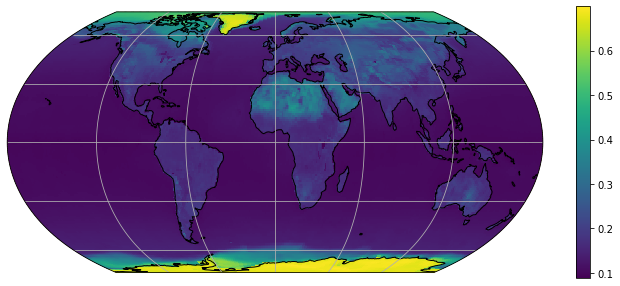

In [3]:
albedo_avg=ds.toa_sw_clr_c_clim.mean(dim='month')/ds.solar_clim.mean(dim='month') # climatological mean of clear-sky albedo

# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
albedo_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

In [4]:
# There are no reflection in ITCZ (intertropical convergence zone) since there are no clouds
# Oceans are reflecting less, higher albedo are in the northern part of Africa since there are deserts
# The highest albedo values are at the poles

Repeat the operation with all-sky planetary albedo $\overline{\alpha_{P_{all}}}$. Where are the largest differences? Can you plot the difference between the two on a map, too?

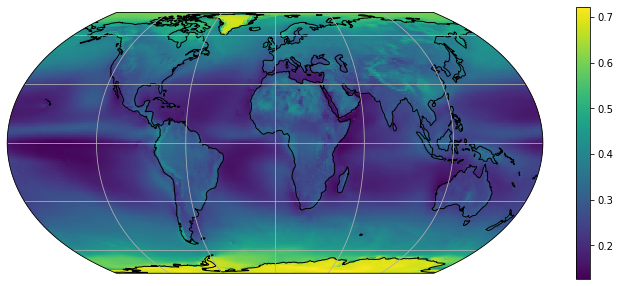

In [5]:
albedo_all_avg=ds.toa_sw_all_clim.mean(dim='month')/ds.solar_clim.mean(dim='month')

# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
albedo_all_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

In [6]:
# The largest differences are over the ITCZ regions, since now we are accounting for clouds presence
# The poles are more or less the same
# the whole map is actualli brighter since now the clouds are considered

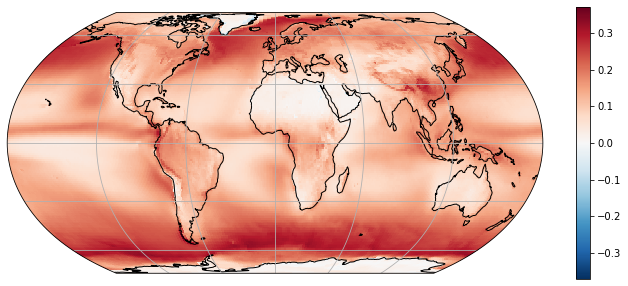

In [7]:
delta_albedo=albedo_all_avg-albedo_avg
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
delta_albedo.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

In [8]:
# This map shows the difference between the two albedos just computed

Now plot the zonal, climatological means $\left[ \overline{\alpha_{P_{all}}} \right]$ and $\left[ \overline{\alpha_{P_{clr}}} \right]$ on the same plot. Add a legend to it!

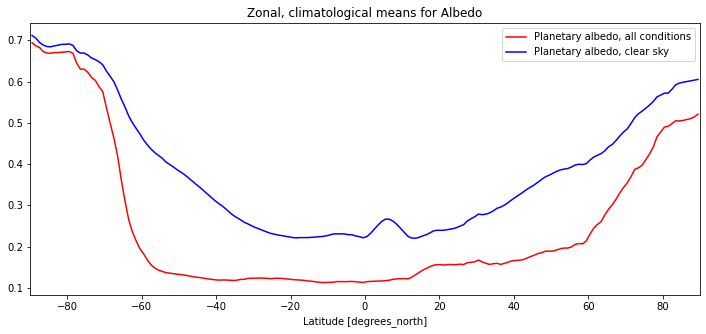

In [9]:
albedo_avg.mean(dim='lon').plot(label='Planetary albedo, all conditions',color='red');
albedo_all_avg.mean(dim='lon').plot(label='Planetary albedo, clear sky',color='blue');
plt.xlim(-90, 90)
plt.title('Zonal, climatological means for Albedo')
plt.legend(loc='best')
plt.ylabel('');

Compute the global average of $\overline{\alpha_{P_{all}}}$ and $\overline{\alpha_{P_{clr}}}$ (remember to weight according to latitude!). Compare the values you obtain with the ones we mentioned in the lecture.

In [10]:
albedo_all_avg_zon=albedo_all_avg.mean(dim='lon') #all condition
weight = np.cos(np.deg2rad(ds.lat)) # we need to weight the importance of low and high latitude. 
weight = weight / weight.sum()
weighted_albedo_all_zon_avg = np.sum(albedo_all_avg_zon * weight)
weighted_albedo_all_zon_avg.item()

0.31385713815689087

In [11]:
albedo_avg_zon=albedo_avg.mean(dim='lon') #clear sky
weighted_albedo_zon_avg = np.sum(albedo_avg_zon * weight)
weighted_albedo_zon_avg.item()

0.17453926801681519

In [12]:
# These two values are consistent with the one mentioned during lectures

### Longwave outgoing radiation 

Repeat the operations above with $LW_{all} $ and  $LW_{clr}$ (i.e.: maps of $\overline{LW_{all}}$, $\overline{LW_{clr}}$, line plots of $\left[ \overline{LW_{all}} \right]$, $\left[ \overline{LW_{clr}} \right]$). What is the global effect of clouds on outgoing longwave radiation?

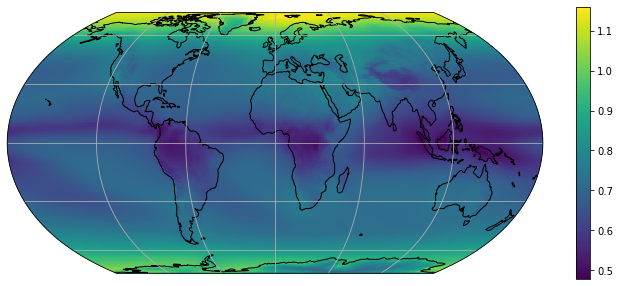

In [13]:
## Maps for Longwave all conditions
albedo_all_avg_lw = ds.toa_lw_all_clim.mean(dim='month')/ds.solar_clim.mean(dim='month')
# albedo is the ratio between the reflected light and the incoming light
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
albedo_all_avg_lw.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

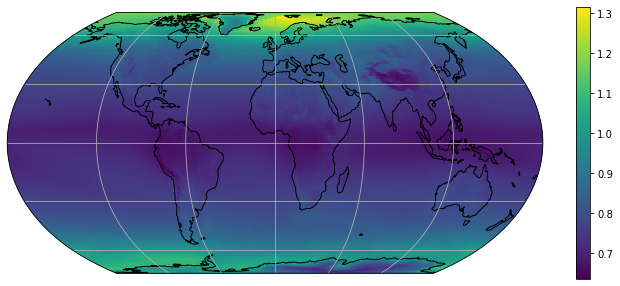

In [14]:
## Maps for Longwave clear sky conditions
albedo_avg_lw = ds.toa_lw_clr_c_clim.mean(dim='month')/ds.solar_clim.mean(dim='month')
# albedo is the ratio between the reflected light and the incoming light
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
albedo_avg_lw.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

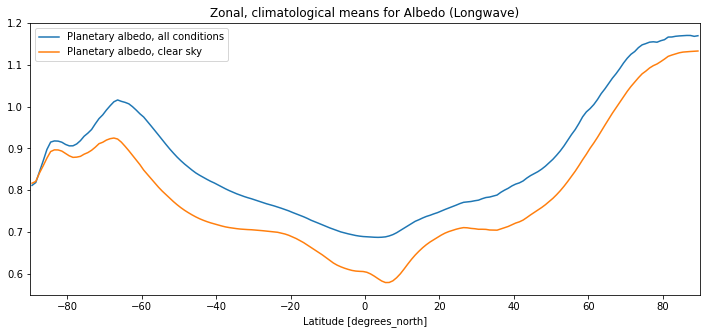

In [15]:
## Zonal average for Longwave
albedo_avg_lw.mean(dim='lon').plot(label='Planetary albedo, all conditions');
albedo_all_avg_lw .mean(dim='lon').plot(label='Planetary albedo, clear sky');
plt.xlim(-90, 90)
plt.title('Zonal, climatological means for Albedo (Longwave)')
plt.legend(loc='best')
plt.ylabel('');

In [16]:
# Clouds increase the global reflection of solar radiation, reducing the amount of solar radiation absorbed by the Earth.
# Low clouds can cool the atmosphere by increasing the downward emission of longwave radiation, while high clouds warm 
# it by decreasing the upward emission of longwave radiation.
# With respect to before, the albedo in all average conditions for the longwave is larger over the whole planet. 
# We can also see the influence of the ITCZ.

## Surface fluxes 

Now open the EBAF-Surface dataset, available for download [here](https://www.dropbox.com/s/r0armbs8ip4op1f/CERES_EBAF-Surface_Ed4.1_Clim-2005-2015.nc?dl=1).

In [17]:
ds1 = xr.open_dataset(r'C:\Users\Beatrice Diana\Desktop\UIBK\Physics of the climate system\Notebook\Week2\data\CERES_EBAF-Surface_Ed4.1_Clim-2005-2015.nc') #Radiation surface
ds1

<xarray.Dataset>
Dimensions:                 (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * month                   (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sfc_sw_down_all_clim    (month, lat, lon) float32 ...
    sfc_sw_down_clr_t_clim  (month, lat, lon) float32 ...
    sfc_sw_up_all_clim      (month, lat, lon) float32 ...
    sfc_sw_up_clr_t_clim    (month, lat, lon) float32 ...
    sfc_lw_down_all_clim    (month, lat, lon) float32 ...
    sfc_lw_down_clr_t_clim  (month, lat, lon) float32 ...
    sfc_lw_up_all_clim      (month, lat, lon) float32 ...
    sfc_lw_up_clr_t_clim    (month, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF_L3B004.1

### Surface albedo 

Compute the all-sky surface albedo $\overline{\alpha_{S_{all}}}$. Plot it on a map.

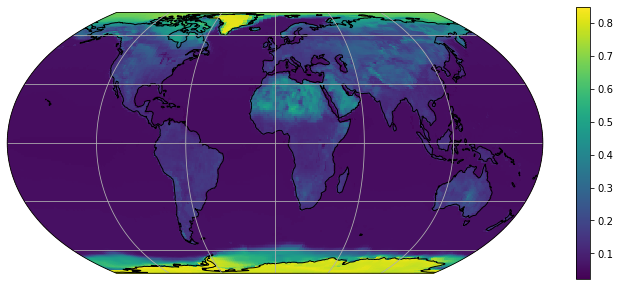

In [18]:
albedo1_all_avg=ds1.sfc_sw_up_all_clim.mean(dim='month')/ds1.sfc_sw_down_all_clim.mean(dim='month')

# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
albedo1_all_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

Compute the global average of $\overline{\alpha_{s}}$.

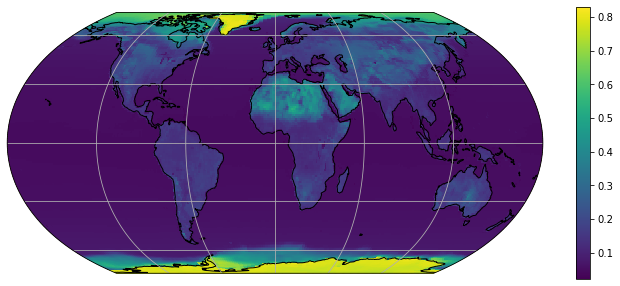

In [19]:
albedo1_all_avg_sw=ds1.sfc_sw_up_clr_t_clim.mean(dim='month')/ds1.sfc_sw_down_clr_t_clim.mean(dim='month')

# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
albedo1_all_avg_sw.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

### Surface energy balance

Now compute the net surface energy intake $\overline{SEB} =  \overline{SW_{in}} - \overline{SW_{out}} + \overline{LW_{in}} - \overline{LW_{out}}$. Plot it on a map and analyse your results. Where does the surface gain most energy? Is the net radiative energy a gain or a loss for the surface of the globe?

In [20]:
# in clear sky
sw_in=ds1.sfc_sw_down_clr_t_clim.mean(dim='month')
sw_out=ds1.sfc_sw_up_clr_t_clim.mean(dim='month')
lw_in=ds1.sfc_lw_down_clr_t_clim.mean(dim='month')
lw_out=ds1.sfc_lw_up_clr_t_clim.mean(dim='month')
SEB=sw_in-sw_out+lw_in-lw_out
SEB

<xarray.DataArray (lat: 180, lon: 360)>
array([[-23.311493, -23.311577, -23.311653, ..., -23.311592, -23.311623,
        -23.311714],
       [-26.794167, -26.794273, -26.79435 , ..., -26.794235, -26.794357,
        -26.794449],
       [-28.552399, -28.552368, -28.55243 , ..., -28.552414, -28.55249 ,
        -28.552505],
       ...,
       [-31.612839, -31.617355, -31.616241, ..., -31.613312, -31.615448,
        -31.612076],
       [-29.925598, -29.925903, -29.925995, ..., -29.924103, -29.924255,
        -29.92424 ],
       [-33.607895, -33.607697, -33.60768 , ..., -33.608017, -33.608078,
        -33.608124]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

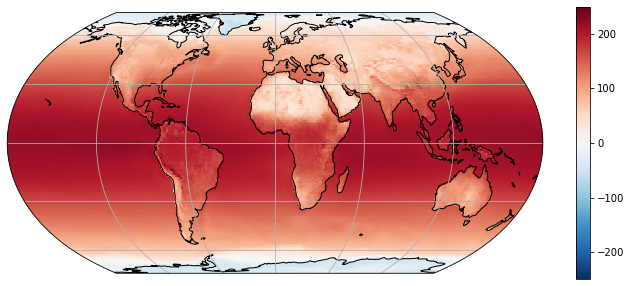

In [21]:
# Define theSEBmap projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
SEB.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

In [22]:
# The surface gain most energy at the equator since it is more red.
# The net radiative energy is a gain the surface of the globe.

Compute the global averages of each term and compare them to the values we discussed in the lecture ([ref](https://www.cgd.ucar.edu/staff/trenbert/trenberth.papers/BAMSmarTrenberth.pdf)). For reference, here is the figure again:

<img src="http://www.skepticalscience.com/pics/Figure1.png" width="50%">

In [23]:
sw_in_avg=sw_in.mean(dim='lon')
sw_out_avg=sw_out.mean(dim='lon')
lw_in_avg=lw_in.mean(dim='lon')
lw_out_avg=lw_out.mean(dim='lon')
sw_in_avg.mean(dim='lat').item()

213.8146514892578

In [24]:
sw_out_avg.mean(dim='lat').item()

41.315574645996094

In [25]:
lw_in_avg.mean(dim='lat').item()

275.19903564453125

In [26]:
lw_out_avg.mean(dim='lat').item()

356.2572021484375

**Discuss the processes that will counterbalance this net radiative energy imbalance, in the oceans and on land! Also discuss the differences between your results and the plot above.** (Careful literature search might lead you to more recent estimates of the budget if you are interested).

In [27]:
# The imbalance (of about 1 W/m2) creates some gradients in pressure and temperature over the surface of the
# Earth and over the oceans. Some cells are created (Hadley cells and Ferrel cells) in order to dissipate these 
# gradients. In the ocean there are circulations as well: AMOC (Atlantic Meridional Overturning Oscillation)